In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
data = pd.read_csv("/home/anatol/course/machine-learning-ex2/ex2/ex2data1.txt",
                   names=['exam1score','exam2score','passornot'],header = None)
x1 = data['exam1score'].to_numpy(np.float32)
x2 = data['exam2score'].to_numpy(np.float32)
y = data['passornot'].to_numpy(np.float32)
x1 = x1.reshape(100,1)
x2 = x2.reshape(100,1)
y= y.reshape(100,1)

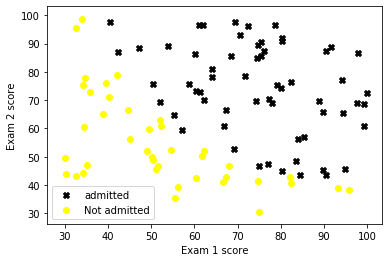

In [2]:
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(x1[pos],x2[pos],
            label='admitted',marker = 'X',color = 'black')
plt.scatter(x1[neg],x2[neg],
            label='Not admitted',marker = 'o',color = 'yellow')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [3]:
test_theta = np.array([[-24],  [0.2],[0.2]])
m = x1.shape[0]
X = np.hstack((np.ones((m,1)),x1,x2))
n = X.shape[1]
def costfunction(X,y,theta):
    m = X.shape[0]  
    h = 1/(1+np.exp(-X @ theta))
    J = -1/m*(np.sum(y * np.log(h) + (1 - y) * np.log(1-h)))
    
        
    return J 

def gradient(X,y,theta):
    n = X.shape[1]
    grad = np.zeros((n,1))
    m = X.shape[0]
    h = 1/(1+np.exp(-X @ theta))
    for i in range (n):
        
        grad[i,0] = 1/m*(X[:,i] @ (h - y) )
    return grad
    
J = costfunction(X,y,test_theta)
grad = gradient(X,y,test_theta)
print(J)#expected 0.693
print(grad)#expected -0.1,-12.0092,-11.2628421


0.21833020333666284
[[0.042903  ]
 [2.56623421]
 [2.64679781]]


In [4]:
itera = 5000
alpha = 0.0001
def grades(X,y,theta,alpha,itera,num_of_theta):
    J_his = np.zeros((itera,1))
    theta_his = np.zeros((itera+1,n))
    val = np.zeros((num_of_theta,1))    
    
    for i in range(itera):        
        J_his[i,0] = costfunction(X,y,theta)
        val = theta - alpha * gradient(X,y,theta)
        theta = val
       # print(val)
        theta_his[i+1,:] = val[:,0]
        #theta[:,0] = theta_his[i,:]
    return J_his,theta_his

J_his,theta_his = grades(X,y,test_theta ,alpha,itera,n)

print(theta_his[-1,:])
print(J_his[-1])

[-24.00027281   0.19694639   0.19207563]
[0.20370644]


No handles with labels found to put in legend.


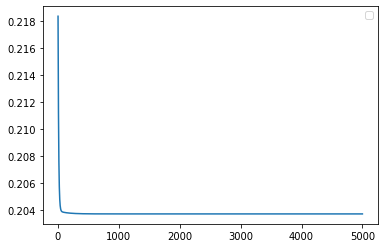

In [5]:
plt.plot(np.linspace(1,itera,itera),(J_his))
plt.legend()
plt.show()

In [6]:
predict = 1/(1+np.exp(-(theta_his[-1,:] @ np.array([[1],[45],[85]]))))

predict#expected 0.775

array([0.76651627])

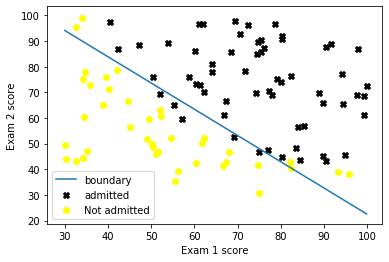

In [7]:
boundary_x = np.array([[np.min(X[:,1])],[np.max(X[:,1])]])
boundary_y = ((-theta_his[-1,0]) - theta_his[-1,1] * boundary_x)/theta_his[-1,2]
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(x1[pos],x2[pos],
            label='admitted',marker = 'X',color = 'black')
plt.scatter(x1[neg],x2[neg],
            label='Not admitted',marker = 'o',color = 'yellow')
plt.plot(boundary_x,boundary_y, label='boundary')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [8]:
def predict(theta,X):
    product = X @ np.transpose(theta)
    product = product.reshape(X.shape[0],1)
    p = 1/(1+np.exp(-(product)))
    p = np.where(p <= 0.5, 0, 1)
    return p
    
p = predict(theta_his[-1,:],X)


In [9]:
np.mean(np.float32((p == y)))#0.89 expected



0.89